In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


In [4]:
df = pd.read_csv('income.csv')

In [5]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [6]:
df.shape

(22, 3)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,22.0,34.818182,5.901060,26.0,29.0,36.5,39.75,43.0
Income($),22.0,90431.818182,43505.964412,45000.0,58500.0,67500.0,135250.00,162000.0


In [10]:
df.isnull().sum()

Name         0
Age          0
Income($)    0
dtype: int64

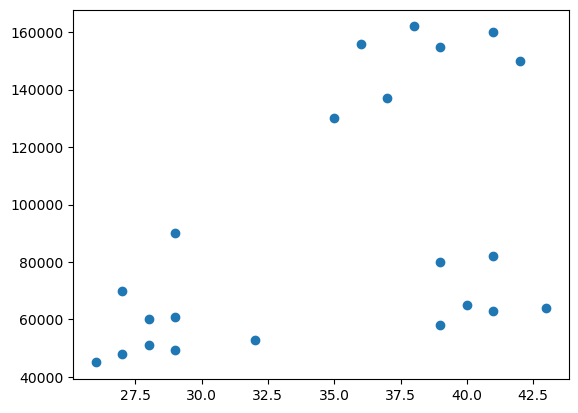

In [13]:
plt.scatter(df['Age'],df['Income($)'])
plt.show()

In [14]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [38]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])

In [16]:
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [17]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


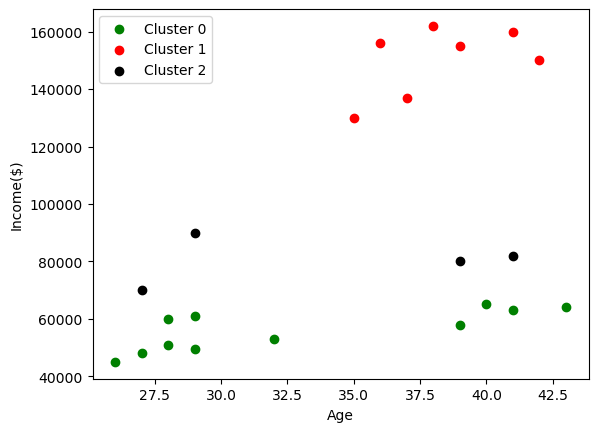

In [19]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color='green', label='Cluster 0')
plt.scatter(df2.Age, df2['Income($)'], color='red', label='Cluster 1')
plt.scatter(df3.Age, df3['Income($)'], color='black', label='Cluster 2')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()
plt.show()


In [26]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [39]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [28]:
df['cluster'] = y_predicted
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [30]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

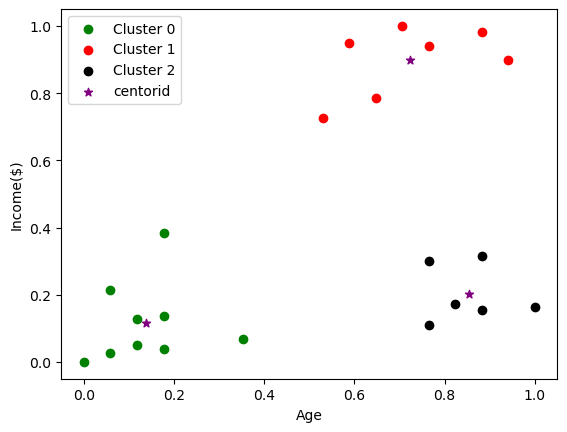

In [31]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color='green', label='Cluster 0')
plt.scatter(df2.Age, df2['Income($)'], color='red', label='Cluster 1')
plt.scatter(df3.Age, df3['Income($)'], color='black', label='Cluster 2')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],color='purple', marker='*', label= 'centorid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()
plt.show()


In [40]:
k_rang = range(1,10)
sse = []
for k in k_rang:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)
    

In [41]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.34910470944195643,
 0.2621792762345213,
 0.21055478995472487,
 0.16858512236029757,
 0.13265419827245162,
 0.10188787724979424]

In [ ]:
## Elbow Te

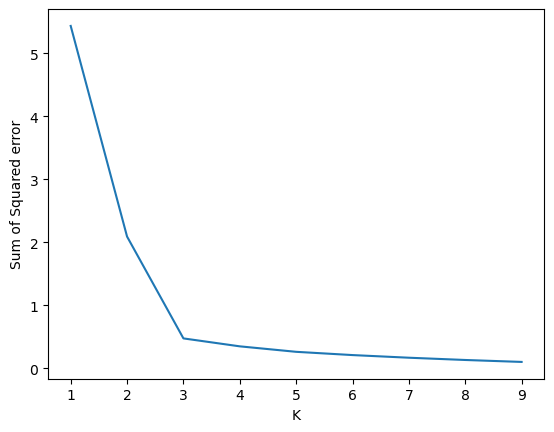

In [43]:
plt.xlabel('K')
plt.ylabel('Sum of Squared error')
plt.plot(k_rang, sse)